In [1]:
import keras
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words = NUM)

In [2]:
NUM = 10000

In [75]:
def decode(txt):
    reverse = dict([(value+3, key) for (key, value) in imdb.get_word_index().items()])
    decode = ' '.join([reverse.get(i,'kk') for i in txt])
    return decode
print(decode(train_data[0]))

<class 'list'>
kk this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert kk is an amazing actor and now the same being director kk father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for kk and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also kk to the two little boy's that played the kk of norman and paul they were just brilliant children are often left out of the kk list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

In [36]:
import numpy as np

def vec_seq(seq, dim=NUM):
    result = np.zeros((len(seq), dim))
    for i, seq in enumerate(seq):
        result[i][seq] = 1 
    return result
x_train = vec_seq(train_data)
x_test = vec_seq(test_data)

(25000,)


In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_lables).astype('float32')

In [13]:
from keras import models, layers, regularizers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(NUM,), kernel_regularizer=regularizers.l1(0.0007)))
model.add(layers.Dense(8, activation='relu' , kernel_regularizer=regularizers.l1(0.0007)))
# model.add(layers.Dropout(.8))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

In [15]:
epochs = 20

In [16]:
history = model.fit(x_train, y_train, epochs = epochs, batch_size=512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 12s 401ms/step - loss: 0.8081 - accuracy: 0.6863 - val_loss: 0.6630 - val_accuracy: 0.8307
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6164 - accuracy: 0.8256 - val_loss: 0.5851 - val_accuracy: 0.8443
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5445 - accuracy: 0.8645 - val_loss: 0.5260 - val_accuracy: 0.8580
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4919 - accuracy: 0.8739 - val_loss: 0.4945 - val_accuracy: 0.8617
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4605 - accuracy: 0.8779 - val_loss: 0.4761 - val_accuracy: 0.8645
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4403 - accuracy: 0.8830 - val_loss: 0.4520 - val_accuracy: 0.8720
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4249 - accuracy: 0.8859 - val_loss: 0.4427 - val_accuracy: 0.8762
Epoch 8/20


In [17]:
his_dic = history.history
his_dic.keys()
# len(his_dic['loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

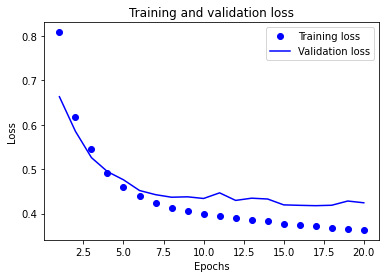

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1,epochs+1), np.array(his_dic['loss']),'bo', label='Training loss')
plt.plot(range(1,epochs+1), np.array(his_dic['val_loss']),'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

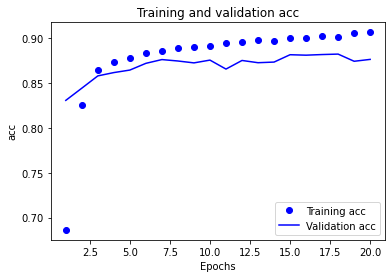

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(1,epochs+1), np.array(his_dic['accuracy']),'bo', label='Training acc')
plt.plot(range(1,epochs+1), np.array(his_dic['val_accuracy']),'b', label='Validation acc')

plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [20]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4289 - accuracy: 0.8713


[0.4288879334926605, 0.8713200092315674]

In [125]:
def encode_txt(txt):
    encoded_Str = [imdb.get_word_index().get(i,'?') for i in txt.split(' ')]
    encoded_Str.remove("?")
    encoded_Str = [i+3 for i in encoded_Str]
    return encoded_Str

In [126]:
def classify_review(txt):
    test = encode_txt(txt)
    test = vec_seq(np.array([test]))
    result = model.predict(test)
    print(result)
    return ("Positive" if result > 0.5 else "Negative" )

In [127]:
print(decode(encode_txt("I really loved this movie it was amazing")))

really loved this movie it was amazing


In [128]:
# new_input = "I really loved this movie it was amazing"
new_input = "I really hate this movie it was very bad"
print(classify_review(new_input))

[[0.30585986]]
Negative
